In [1]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], enable=True)

In [3]:
(X_train, y_train ), (X_test, y_test) = keras.datasets.cifar10.load_data()

In [4]:
X_train.shape

(50000, 32, 32, 3)

In [5]:
print(X_train)

[[[[ 59  62  63]
   [ 43  46  45]
   [ 50  48  43]
   ...
   [158 132 108]
   [152 125 102]
   [148 124 103]]

  [[ 16  20  20]
   [  0   0   0]
   [ 18   8   0]
   ...
   [123  88  55]
   [119  83  50]
   [122  87  57]]

  [[ 25  24  21]
   [ 16   7   0]
   [ 49  27   8]
   ...
   [118  84  50]
   [120  84  50]
   [109  73  42]]

  ...

  [[208 170  96]
   [201 153  34]
   [198 161  26]
   ...
   [160 133  70]
   [ 56  31   7]
   [ 53  34  20]]

  [[180 139  96]
   [173 123  42]
   [186 144  30]
   ...
   [184 148  94]
   [ 97  62  34]
   [ 83  53  34]]

  [[177 144 116]
   [168 129  94]
   [179 142  87]
   ...
   [216 184 140]
   [151 118  84]
   [123  92  72]]]


 [[[154 177 187]
   [126 137 136]
   [105 104  95]
   ...
   [ 91  95  71]
   [ 87  90  71]
   [ 79  81  70]]

  [[140 160 169]
   [145 153 154]
   [125 125 118]
   ...
   [ 96  99  78]
   [ 77  80  62]
   [ 71  73  61]]

  [[140 155 164]
   [139 146 149]
   [115 115 112]
   ...
   [ 79  82  64]
   [ 68  70  55]
   [ 67  69

In [6]:
data_class = ('airplane',
'automobile',
'bird',
'cat',
'deer',
'dog',
'frog',
'horse',
'ship',
'truck')

In [7]:
y_train = y_train.reshape(len(y_train))
y_train

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

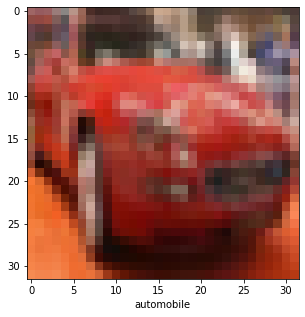

In [8]:
def plott(x,y, index):
    plt.figure(figsize=(10,5))
    plt.imshow(x[index])
    plt.xlabel(data_class[y[index]])
    
plott(X_train, y_train, 5)

In [9]:
X_test = X_test/255
X_train = X_train/255


In [10]:
model = keras.Sequential([
    #cnn 
    keras.layers.Conv2D(filters = 32, kernel_size=3 , input_shape=(32,32, 3), activation = 'relu', ),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Conv2D(filters = 32, kernel_size=3, activation = 'relu', ),
    keras.layers.MaxPool2D((2,2)),
    #dens
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(X_train, y_train, batch_size = 8, epochs = 10)

Epoch 1/10
6250/6250 [==============================] - 24s 3ms/step - loss: 1.6600 - accuracy: 0.3906
Epoch 2/10
6250/6250 [==============================] - 21s 3ms/step - loss: 1.1301 - accuracy: 0.6002
Epoch 3/10
6250/6250 [==============================] - 21s 3ms/step - loss: 1.0012 - accuracy: 0.6524
Epoch 4/10
6250/6250 [==============================] - 20s 3ms/step - loss: 0.9277 - accuracy: 0.6753
Epoch 5/10
6250/6250 [==============================] - 21s 3ms/step - loss: 0.8684 - accuracy: 0.6973
Epoch 6/10
6250/6250 [==============================] - 21s 3ms/step - loss: 0.8239 - accuracy: 0.7117
Epoch 7/10
6250/6250 [==============================] - 22s 4ms/step - loss: 0.7838 - accuracy: 0.7251
Epoch 8/10
6250/6250 [==============================] - 21s 3ms/step - loss: 0.7569 - accuracy: 0.7348
Epoch 9/10
6250/6250 [==============================] - 20s 3ms/step - loss: 0.7201 - accuracy: 0.7477
Epoch 10/10
6250/6250 [==============================] - 21s 3ms/step - l

In [16]:
y_Predicted = model.predict(X_test)
data_class[np.argmax(y_Predicted[5])]


'frog'

In [21]:
y_test = y_test.reshape(-1)

In [22]:
data_class[y_test[5]]

'frog'

In [66]:
def predict(index):
    ##input
    input_img = plt.imshow(X_test[index])
    plt.show()
    y_pred = print(f' prediction : {data_class[np.argmax(y_Predicted[index])]}')
    y_true = print(f' truth : {data_class[y_test[index]]}')
    return

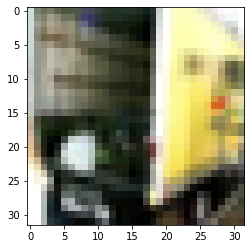

 prediction : truck
 truth : truck


In [67]:
predict(654)